___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
dataframe = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
dataframe.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
dataframe[dataframe['installment'].apply(lambda x: x+1) == 830.10]
big_frame = pd.merge(left=dataframe, right=dataframe, left_on=dataframe['installment'].apply(lambda x: x+1), right_on=dataframe['installment'].apply(lambda x: x+1))

# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

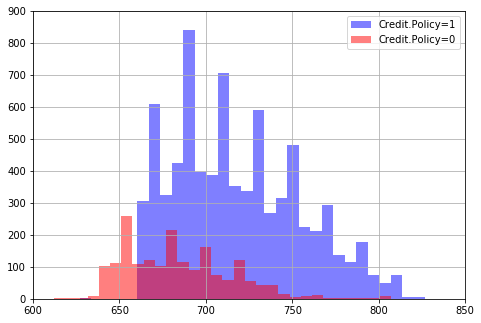

In [5]:
import seaborn as sns
%matplotlib inline
figure = plt.figure()
ax = figure.add_axes([0, 0, 1, 1])
ax.set_xlim(left=600, right=850)
ax.set_ylim(top=900)
# ax.hist(dataframe['fico'], hue='credit.policy')
# sns.countplot(data=dataframe, x='fico', hue='credit.policy')
dataframe[dataframe['credit.policy']==1]['fico'].hist(bins=30, color='blue', ax=ax, alpha=0.5,label='Credit.Policy=1')
dataframe[dataframe['credit.policy']==0]['fico'].hist(bins=30, color='red', ax=ax, alpha=0.5,label='Credit.Policy=0')
plt.legend()

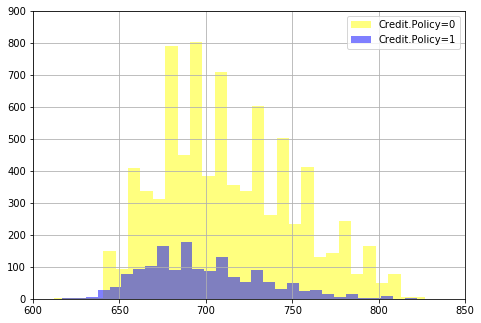

In [6]:
import seaborn as sns
%matplotlib inline
figure = plt.figure()
ax = figure.add_axes([0, 0, 1, 1])
ax.set_xlim(left=600, right=850)
ax.set_ylim(top=900)
# ax.hist(dataframe['fico'], hue='credit.policy')
# sns.countplot(data=dataframe, x='fico', hue='credit.policy')

dataframe[dataframe['not.fully.paid']==0]['fico'].hist(bins=30, color='yellow', ax=ax, alpha=0.5,label='Credit.Policy=0')
dataframe[dataframe['not.fully.paid']==1]['fico'].hist(bins=30, color='blue', ax=ax, alpha=0.5,label='Credit.Policy=1')
plt.legend()

** Create a similar figure, except this time select by the not.fully.paid column.**

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

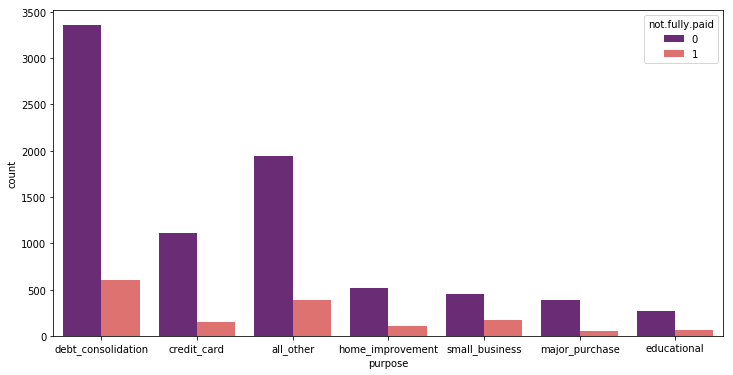

In [7]:
figure = plt.figure(figsize=(12,6))
ax = figure.add_axes()
sns.countplot(data=dataframe, x='purpose', ax=ax, hue='not.fully.paid', palette='magma')

In [8]:
dataframe[dataframe['credit.policy']==1].groupby(by='purpose').count()['credit.policy']

purpose
all_other             1835
credit_card           1020
debt_consolidation    3223
educational            254
home_improvement       512
major_purchase         371
small_business         495
Name: credit.policy, dtype: int64

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

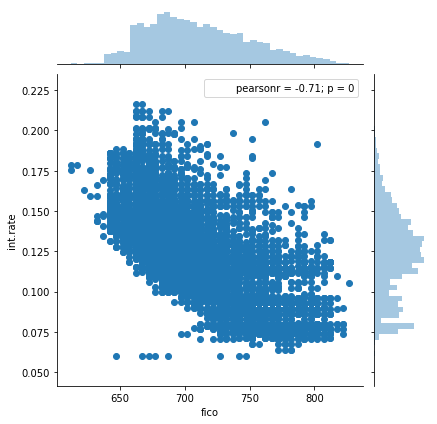

In [9]:
sns.jointplot(data=dataframe, x='fico', y='int.rate')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

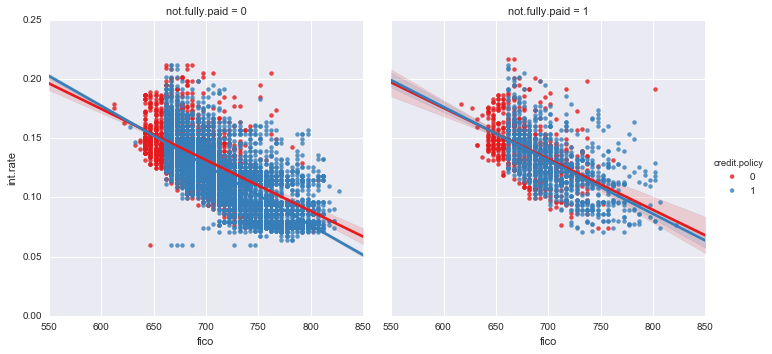

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [18]:
dummy = pd.get_dummies(data=dataframe, columns=['purpose'], drop_first=True)

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [19]:
dummy.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [23]:
from sklearn.cross_validation import train_test_split
import numpy as np

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [29]:
y = dummy.iloc[:, :1].values
x = dummy.iloc[:, 1:].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [31]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [32]:
dec_tree_classifier = DecisionTreeClassifier()

In [33]:
dec_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [38]:
dec_tree_classifier.feature_importances_

array([ 0.00686457,  0.00137079,  0.02273599,  0.04762154,  0.30649468,
        0.10654801,  0.07110806,  0.01267135,  0.42185219,  0.        ,
        0.00088827,  0.00049349,  0.        ,  0.        ,  0.00047375,
        0.        ,  0.00087731,  0.        ])

In [41]:
list_of_data = []
for cattegorie, importance in zip(dummy.columns[1:], dec_tree_classifier.feature_importances_):
    list_of_data.append([cattegorie, importance])
importnace_dataframe = pd.DataFrame(list_of_data)
list_of_data

[['int.rate', 0.0068645749822160594],
 ['installment', 0.0013707919570771776],
 ['log.annual.inc', 0.022735987909670508],
 ['dti', 0.047621537489048911],
 ['fico', 0.30649468150726605],
 ['days.with.cr.line', 0.10654801038888916],
 ['revol.bal', 0.071108059436706048],
 ['revol.util', 0.012671353678433651],
 ['inq.last.6mths', 0.42185219180506345],
 ['delinq.2yrs', 0.0],
 ['pub.rec', 0.00088827318818601123],
 ['not.fully.paid', 0.00049348510454778395],
 ['purpose_credit_card', 0.0],
 ['purpose_debt_consolidation', 0.0],
 ['purpose_educational', 0.00047374570036587285],
 ['purpose_home_improvement', 0.0],
 ['purpose_major_purchase', 0.00087730685252939366],
 ['purpose_small_business', 0.0]]

In [44]:
importnace_dataframe.sort_values(by=1)

,0,1
17,purpose_small_business,0.000000
15,purpose_home_improvement,0.000000
13,purpose_debt_consolidation,0.000000
12,purpose_credit_card,0.000000
9,delinq.2yrs,0.000000
14,purpose_educational,0.000474
11,not.fully.paid,0.000493
16,purpose_major_purchase,0.000877
10,pub.rec,0.000888
1,installment,0.001371


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
y_predict = dec_tree_classifier.predict(X_test)

In [48]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       607
          1       0.99      0.99      0.99      2554

avg / total       0.99      0.99      0.99      3161



In [50]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

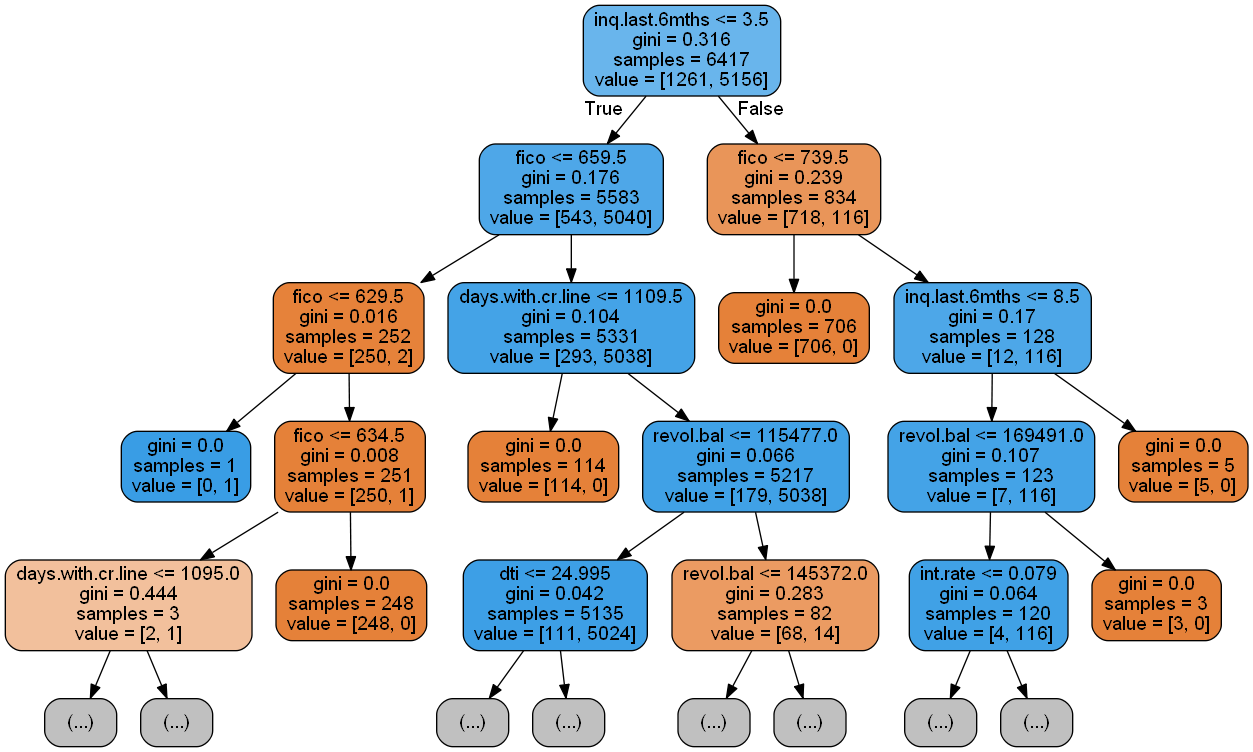

In [53]:
dot_data = StringIO()  
export_graphviz(dec_tree_classifier, out_file=dot_data,feature_names=list(dummy.columns[1:]),filled=True,rounded=True, max_depth=4)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 


In [49]:
print(confusion_matrix(y_test, y_predict))

[[ 589   18]
 [  16 2538]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.56      0.01      0.02       443

avg / total       0.80      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

[[2427    4]
 [ 438    5]]


**What performed better the random forest or the decision tree?**

# Great Job!